
# 자동차 구매 가격 예측



# PROBLEM STATEMENT

다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측하여, 그 사람에게 맞는 자동차를 보여주려 한다. 

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth (순자산)

예측하고자 하는 값 : 
- Car Purchase Amount 

# STEP #0: 라이브러리 임포트 및 코랩 환경 설정

[구글 드라이브 파일 읽기 참고](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### csv 파일을 읽기 위해, 구글 드라이브 마운트 하시오

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

In [3]:
import os
os.chdir('/content/drive/MyDrive/kdigital2/deeplearning')

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다. 

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [4]:
df = pd.read_csv('data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')


### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [5]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### 연봉이 가장 높은 사람은 누구인가

### 나이가 가장 어린 고객은, 연봉이 얼마인가

# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING




### NaN 값이 있으면, 이를 해결하시오.

In [6]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [7]:
df.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09301,11609.38091,238961.2505,35321.45877


In [8]:
X = df.iloc[ : , 3 : -2+1 ]

In [9]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [10]:
y = df['Car Purchase Amount']

### 피처 스케일링 하겠습니다. 정규화(normalization)를 사용합니다. MinMaxScaler 를 이용하시오.

In [11]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc_X = MinMaxScaler()

In [15]:
X_scaled = sc_X.fit_transform(X)

### 학습을 위해서, y 의 shape 을 변경하시오.

In [16]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [17]:
y.shape

(500,)

In [21]:
y = y.values.reshape(500, 1)

### y 도 피처 스케일링 하겠습니다. X 처럼 y도 노멀라이징 하시오.

In [22]:
sc_y = MinMaxScaler()

In [24]:
y_scaled = sc_y.fit_transform(y)

In [25]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

### 트레이닝셋과 테스트셋으로 분리하시오. (테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=11)

### 아래 라이브러리를 임포트 하시오

In [28]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 딥러닝을 이용한 모델링을 하시오.

In [29]:
X_train.shape

(400, 5)

In [30]:
def build_model() :
  model = Sequential()
  model.add(Dense(units= 5, activation='relu', input_shape=(5, )))
  model.add(Dense(units= 25, activation='relu'))
  model.add(Dense(units=10, activation='relu'))
  model.add(Dense(units=1, activation='linear'))
  model.compile('adam', 'mse')
  return model

### 옵티마이저는 'adam' 으로 하고, 로스펑션은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

In [31]:
model = build_model()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 25)                150       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


### 학습을 진행하시오.

In [33]:
epoch_history = model.fit(X_train, y_train, epochs= 20, batch_size = 10)

Epoch 1/20
40/40 [==============================] - 1s 4ms/step - loss: 0.1212
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 11/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 12/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 13/20
40/40 [==============================

# STEP#5: EVALUATING THE MODEL 

### 테스트셋으로 예측을 해 보시오.

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([[0.7933044 ],
       [0.49632728],
       [0.28638408],
       [0.5440835 ],
       [0.46795097],
       [0.58028936],
       [0.48348448],
       [0.49192813],
       [0.57504934],
       [0.98421043],
       [0.41643786],
       [0.44924438],
       [0.41912642],
       [0.47015235],
       [0.49770096],
       [0.48361   ],
       [0.56622833],
       [0.3363962 ],
       [0.49951363],
       [0.4208403 ],
       [0.578619  ],
       [0.6493427 ],
       [0.6113309 ],
       [0.43475515],
       [0.7232822 ],
       [0.6006127 ],
       [0.3221684 ],
       [0.46967787],
       [0.6381784 ],
       [0.46327102],
       [0.43695024],
       [0.3656705 ],
       [0.6017742 ],
       [0.71801364],
       [0.3510628 ],
       [0.5843048 ],
       [0.6135742 ],
       [0.4440804 ],
       [0.6926386 ],
       [0.40981424],
       [0.56184834],
       [0.57737356],
       [0.6820528 ],
       [0.53833973],
       [0.43789706],
       [0.28222144],
       [0.73489   ],
       [0.364

In [36]:
y_test

array([[0.80505204],
       [0.49908428],
       [0.30761974],
       [0.54497514],
       [0.47470876],
       [0.56829414],
       [0.47019791],
       [0.47873651],
       [0.56035434],
       [1.        ],
       [0.42634618],
       [0.45278122],
       [0.44492764],
       [0.45669016],
       [0.51912329],
       [0.46457217],
       [0.56901367],
       [0.2911385 ],
       [0.51220225],
       [0.39926954],
       [0.61500514],
       [0.67013948],
       [0.61562087],
       [0.45118709],
       [0.71808681],
       [0.60728039],
       [0.34882593],
       [0.47568675],
       [0.64539707],
       [0.47597174],
       [0.4615406 ],
       [0.37628608],
       [0.62002621],
       [0.69917902],
       [0.33380674],
       [0.60775236],
       [0.58368485],
       [0.43805795],
       [0.73406295],
       [0.41613807],
       [0.571387  ],
       [0.60117759],
       [0.6825565 ],
       [0.5264948 ],
       [0.45107076],
       [0.28900791],
       [0.72480623],
       [0.375

### 실제값과 예측값을 plot 으로 나타내시오.

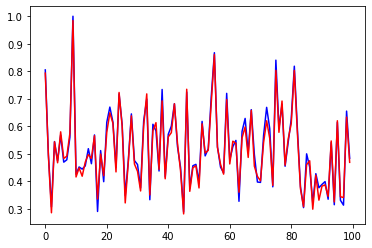

In [38]:
plt.plot(y_test, c='b')
plt.plot(y_pred, c='r')
plt.show()

### MSE 를 계산하시오.

In [41]:
((y_test - y_pred)**2).mean()

0.0003684738316734632

In [42]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 15ms/step - loss: 3.6847e-04


0.0003684737894218415

### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.